In [1]:
%matplotlib inline

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Facial Key-Points detection

Taken from Kaggle (https://www.kaggle.com/c/facial-keypoints-detection): 

> The objective of this task is to predict keypoint positions on face images. This can be used as a building block in several applications, such as:
> 1. tracking faces in images and video
> 2. analysing facial expressions
> 3. detecting dysmorphic facial signs for medical diagnosis
> 4. biometrics / face recognition
>
> Detecing facial keypoints is a very challenging problem.  Facial features vary greatly from one individual to another, and even for a single individual, there is a large amount of variation due to 3D pose, size, position, viewing angle, and illumination conditions. Computer vision research has come a long way in addressing these difficulties, but there remain many opportunities for improvement.

In this project, we'll start with an EDA to identify important features, limitations and necessary transformations of our dataset. Then we will split the data into train, dev and test data to train models to evaluate different models.

## EDA

First we examine the data and types. Note that since there are a lot of columns, we've transponsed the rows here:

In [2]:
data = pd.read_csv('~/Downloads/training.csv')
data.head(3).transpose()

,0,1,2
left_eye_center_x,66.0336,64.3329,65.0571
left_eye_center_y,39.0023,34.9701,34.9096
right_eye_center_x,30.227,29.9493,30.9038
right_eye_center_y,36.4217,33.4487,34.9096
left_eye_inner_corner_x,59.5821,58.8562,59.412
left_eye_inner_corner_y,39.6474,35.2743,36.321
left_eye_outer_corner_x,73.1303,70.7227,70.9844
left_eye_outer_corner_y,39.97,36.1872,36.321
right_eye_inner_corner_x,36.3566,36.0347,37.6781
right_eye_inner_corner_y,37.3894,34.3615,36.321


### Overview of data

In [3]:
pd.DataFrame({'type': data.dtypes})

,type
left_eye_center_x,float64
left_eye_center_y,float64
right_eye_center_x,float64
right_eye_center_y,float64
left_eye_inner_corner_x,float64
left_eye_inner_corner_y,float64
left_eye_outer_corner_x,float64
left_eye_outer_corner_y,float64
right_eye_inner_corner_x,float64
right_eye_inner_corner_y,float64


As it can be seen, each image has a vector of points for each facial feature. The Image itself has an `object` dtype, however, it appears to be a string when we access it. Let's convert it into a numpy array

In [4]:
print(type(data['Image'][0]))

<class 'str'>


In [5]:
data['Image_Matrix'] = data['Image'].apply(
    lambda x: np.array(x.split(' '), dtype=np.float)
)

data.head(3).transpose()

,0,1,2
left_eye_center_x,66.0336,64.3329,65.0571
left_eye_center_y,39.0023,34.9701,34.9096
right_eye_center_x,30.227,29.9493,30.9038
right_eye_center_y,36.4217,33.4487,34.9096
left_eye_inner_corner_x,59.5821,58.8562,59.412
left_eye_inner_corner_y,39.6474,35.2743,36.321
left_eye_outer_corner_x,73.1303,70.7227,70.9844
left_eye_outer_corner_y,39.97,36.1872,36.321
right_eye_inner_corner_x,36.3566,36.0347,37.6781
right_eye_inner_corner_y,37.3894,34.3615,36.321


Using this, we can plot some random images as examples

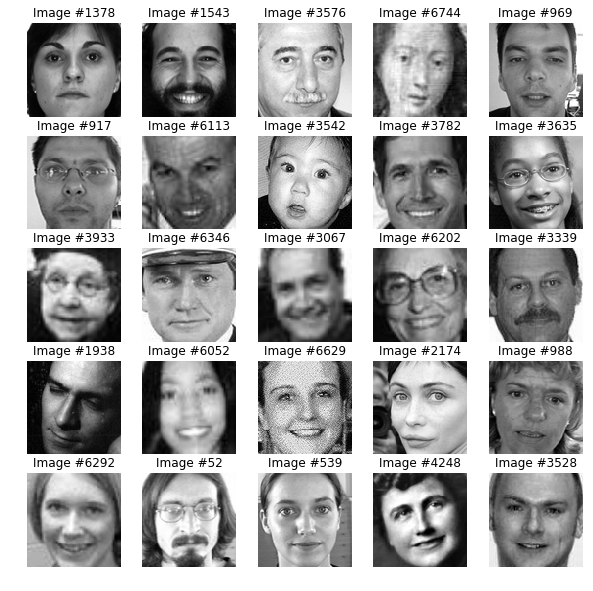

In [6]:
def plot_image_and_points(ax, image_vec, points_vec):
    ax.imshow(image_vec.reshape(96,96), cmap='gray')
    if points_vec is not None:
        coords = points_vec.reshape((15, 2))
        ax.plot(coords[:, 0], coords[:, 1], 'rx')
        

def plot_random(dataset, nrows, ncols):
    #Plot a random array of faces
    face_ids = np.random.randint(low=0, high=len(dataset), size=(nrows*ncols))
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for face_id, ax in zip(face_ids, axes.ravel()):
        plot_image_and_points(ax, dataset[face_id], None)
        ax.set_title("Image #{}".format(face_id))
        ax.axis('off')


plot_random(
    dataset=data['Image_Matrix'],
    nrows=5,
    ncols=5
)

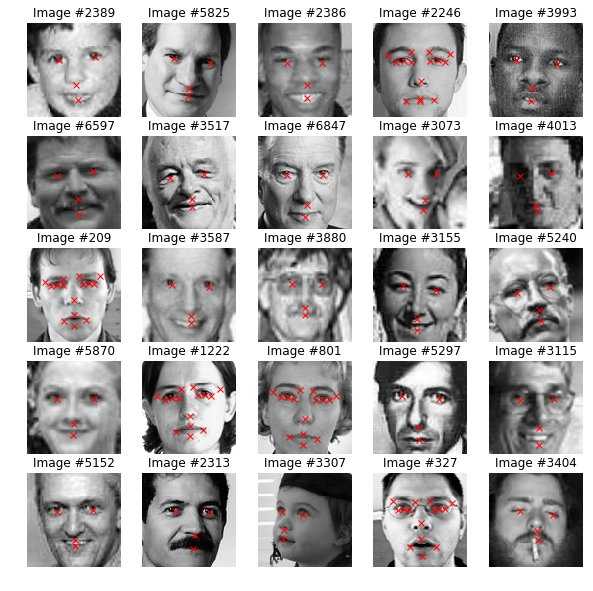

In [7]:
def plot_random_with_points(images, key_point_arrays, nrows, ncols):
    #Plot a random array of faces with markers
    face_ids = np.random.randint(low=0, high=len(images), size=(nrows*ncols))
    
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for face_id, ax in zip(face_ids, axes.ravel()):
        plot_image_and_points(ax, images[face_id], key_point_arrays[face_id])
        ax.set_title("Image #{}".format(face_id))
        ax.axis('off')


plot_random_with_points(
    images=data['Image_Matrix'],
    key_point_arrays=data.iloc[:, :-2].values,
    nrows=5,
    ncols=5
)

### Missing data:

It appears as though some rows also have some missing values for some columns 

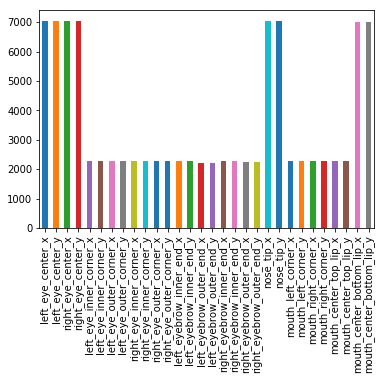

In [8]:
# Files appear to be organized with NaNs at the end
# plot a bar of values to position of the data
data.describe().loc['count'].plot.bar();

Particularly, we've noticed that the data in the lower rows tend to have missing values. Below is the first and last row of the dataset as examples:

,0,7048
left_eye_center_x,66.0336,66.9383
left_eye_center_y,39.0023,43.4245
right_eye_center_x,30.227,31.0961
right_eye_center_y,36.4217,39.5286
left_eye_inner_corner_x,59.5821,NaN
left_eye_inner_corner_y,39.6474,NaN
left_eye_outer_corner_x,73.1303,NaN
left_eye_outer_corner_y,39.97,NaN
right_eye_inner_corner_x,36.3566,NaN
right_eye_inner_corner_y,37.3894,NaN


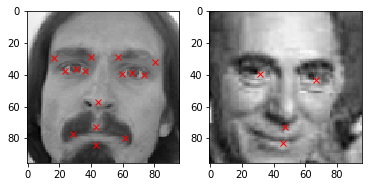

In [9]:
# first and last row plotted
f, axes = plt.subplots(nrows=1, ncols=2)
plot_image_and_points(axes[0], data['Image_Matrix'][0], data.iloc[0, :-2].values)
plot_image_and_points(axes[1], data['Image_Matrix'][len(data)-1], data.iloc[len(data)-1, :-2].values)

# dataframe for reference
data.iloc[[0, -1]].transpose()

This can be more clearly seen if we plot the different columns as a line graph, where x is the position in the dataframe

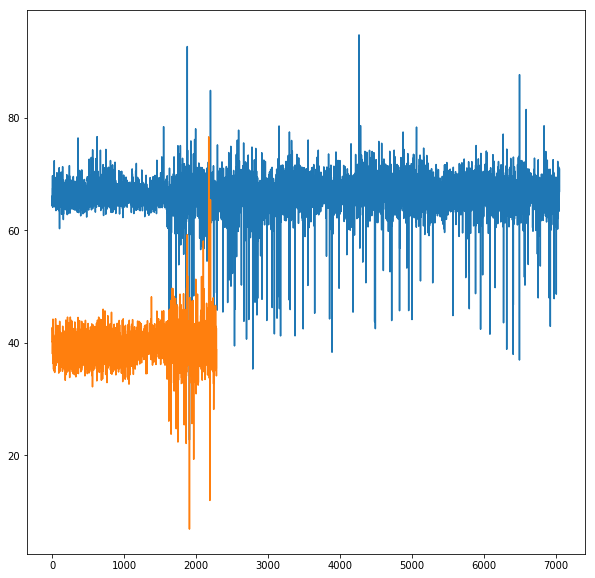

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(data[['left_eye_center_x', 'right_eyebrow_inner_end_x']])
plt.show();

In [11]:
#Based on Frequencies, worthwhile to divide data into 2 training sets (full and partial)

In [12]:
# Leave it to the model being trained?

In [13]:
# was that purposefully done to signify a point can't be found?

### Looking deeper into images

It appears as though a lot of images are grey-scaled photographs of real faces. They could have different expressions, and some even look at slightly different angles to the camera. However, it's worthwhile to note that all images seem to have the key-points within the frame of the image (more on that in the next section).

First, this is a good training example: centered, with all key points visible:

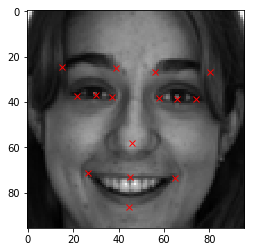

In [14]:
plot_image_and_points(plt, data['Image_Matrix'][1316], data.iloc[1316, :-2].values)

On the other hand, we have blurry or dark images with very few points visible

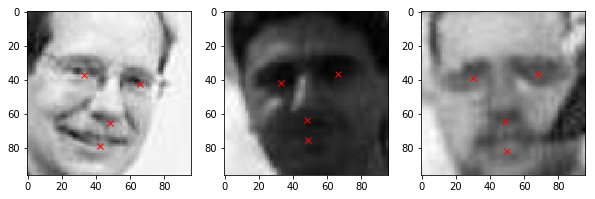

In [15]:
f, axes = plt.subplots(ncols=3, figsize=(10, 10))
for ax, face_id in zip(axes, [6232, 4703, 2909]):
    plot_image_and_points(ax, data['Image_Matrix'][face_id], data.iloc[face_id, :-2].values)

And then there are faces that are partially covered even though the visible key points are clear:

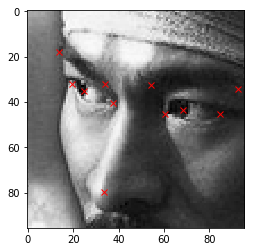

In [16]:
plot_image_and_points(plt, data['Image_Matrix'][1731], data.iloc[1731, :-2].values)

There are works of art in this data set as well. Some of these are faces from paintings, and as the fourth of the following examples show, they can be somewhat abstract or caricatural as well. Thus, we need to be robust to stylistic differences with how faces are depicted

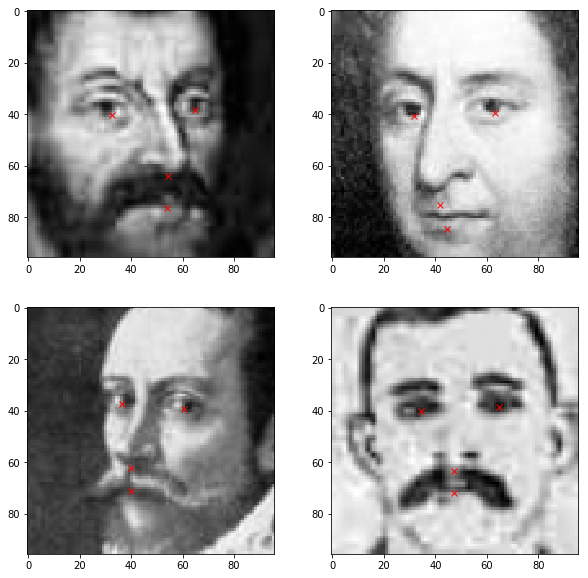

In [17]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
for ax, face_id in zip(axes.ravel(), [2497, 5748, 3571, 4099]):
    plot_image_and_points(ax, data['Image_Matrix'][face_id], data.iloc[face_id, :-2].values)

Finally, we have a bunch of baby pictures. This shows age isn't a constant either

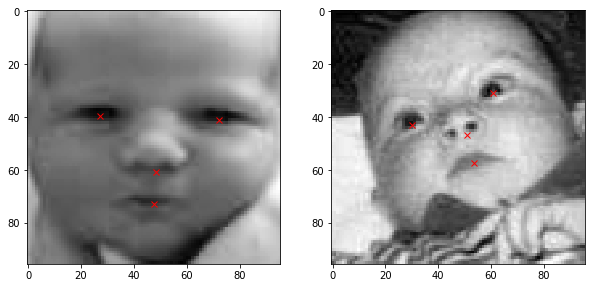

In [18]:
f, axes = plt.subplots(ncols=2, figsize=(10, 10))
for ax, face_id in zip(axes, [6136, 2831]):
    plot_image_and_points(ax, data['Image_Matrix'][face_id], data.iloc[face_id, :-2].values)

In Summary:

1. Many images had centered faces with all key points visible
2. Many are blurry images (?CAN WE EVALUATE THIS STATISTICALLY?)
3. Some don't have enough key points visible in the image
4. Many are artworks - so we need to remove stylistic features from our analyses as well
5. Age is not a factor

### Looking deeper into key points

As observed above, many key points are missing for a lot of images. This can also be seen in the counts in the summary here:

In [19]:
data.iloc[:, :-2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
left_eye_center_x,7039.0,66.359021,3.448233,22.763345,65.082895,66.497566,68.024752,94.689280
left_eye_center_y,7039.0,37.651234,3.152926,1.616512,35.900451,37.528055,39.258449,80.502649
right_eye_center_x,7036.0,30.306102,3.083230,0.686592,28.783339,30.251378,31.768334,85.039381
right_eye_center_y,7036.0,37.976943,3.033621,4.091264,36.327681,37.813273,39.566729,81.270911
left_eye_inner_corner_x,2271.0,59.159339,2.690354,19.064954,58.039339,59.304615,60.519810,84.440991
left_eye_inner_corner_y,2271.0,37.944752,2.307332,27.190098,36.626283,37.878040,39.260348,66.562559
left_eye_outer_corner_x,2267.0,73.330478,3.405852,27.571879,71.716503,73.247824,75.015645,95.258090
left_eye_outer_corner_y,2267.0,37.707008,2.881438,26.250023,36.085523,37.639015,39.373489,64.618230
right_eye_inner_corner_x,2268.0,36.652607,2.350268,5.751046,35.506126,36.651562,37.753571,70.714966
right_eye_inner_corner_y,2268.0,37.989902,2.311907,26.250023,36.766783,37.944075,39.192917,69.808803


Bar plots show the variance and mean of the available points:

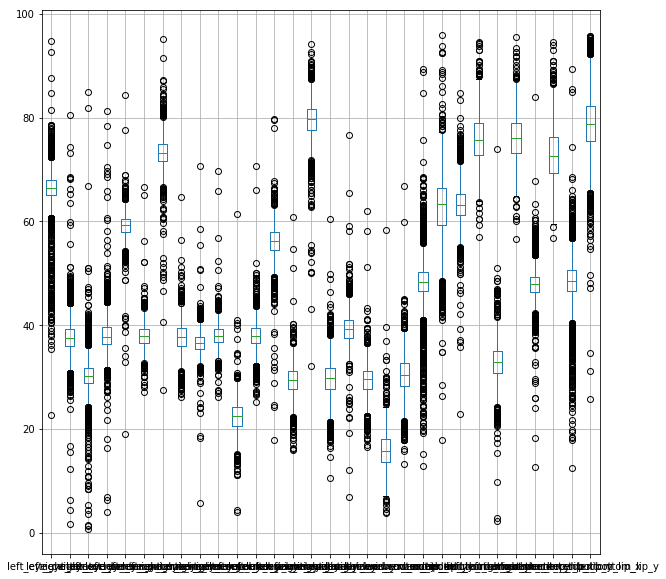

In [20]:
plt.figure(figsize=(10, 10))
data.iloc[:, :-2].boxplot();

Here we can visualize the distribution of key points. The left image contains a sample of points to show how key points vary. The right image shows the average value of facial key points alone.

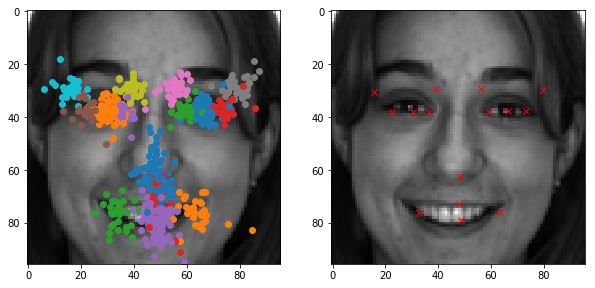

In [21]:
f, axes = plt.subplots(ncols=2, figsize=(10, 10))


# plot a sample of points
axes[0].imshow(data['Image_Matrix'][1316].reshape(96,96), cmap='gray')
for row_num in np.random.randint(len(data), size=100):
    row = data.iloc[row_num, :-2].values
    points = row.reshape(15, 2)
    for idx, point in enumerate(points):
        axes[0].scatter(point[0], point[1], color='C' + str(idx % 10))


# plot the mean values we computed above
plot_image_and_points(axes[1], data['Image_Matrix'][1316], data.iloc[:, :-2].mean().values)

## Modelling

First we need to split the data into test and train. The loss function is RMSE

TODO: FLESH THIS OUT

We'll also use the following metrics for different approaches

In [22]:
_metrics = [
    metrics.mean_absolute_error,
    metrics.mean_squared_error,
    metrics.mean_squared_log_error,
    metrics.r2_score
]

global all_results
all_results = None

def measure_all(method_name, true, pred):
    temp_df = pd.DataFrame({
        'method': method_name,
        **{
            func.__name__: [func(true, pred)]
            for func in _metrics
        }
    })
    global all_results
    if all_results:
        all_results.append(temp_df)
    else:
        all_results = temp_df
        
    return all_results

### Baseline - predicting the mean value for any image

This is a simple model that only predicts the same mean value for each test X value

In [23]:
class MeanValueModel():
    def __init__(self):
        self.means = None
        
    def fit(self, X, Y):
        self.means = np.apply_along_axis(np.mean, 0, Y)
        
    def predict(self, X):
        return np.tile(self.means, len(X)).reshape((len(X), len(self.means)))


complete_train, complete_test = train_test_split(data.dropna(), test_size=0.2)

mvm = MeanValueModel()
mvm.fit(complete_train['Image_Matrix'].values, complete_train.iloc[:, :-2].values)

predicted = mvm.predict(complete_test['Image_Matrix'].values)
predicted

array([[66.19481907, 36.80452905, 29.64305036, ..., 72.63198692,
        48.211396  , 82.57619597],
       [66.19481907, 36.80452905, 29.64305036, ..., 72.63198692,
        48.211396  , 82.57619597],
       [66.19481907, 36.80452905, 29.64305036, ..., 72.63198692,
        48.211396  , 82.57619597],
       ...,
       [66.19481907, 36.80452905, 29.64305036, ..., 72.63198692,
        48.211396  , 82.57619597],
       [66.19481907, 36.80452905, 29.64305036, ..., 72.63198692,
        48.211396  , 82.57619597],
       [66.19481907, 36.80452905, 29.64305036, ..., 72.63198692,
        48.211396  , 82.57619597]])

In [24]:
# since this is the first measurement we're doing, we set this as the all_results thing
measure_all('baseline', complete_test.iloc[:, :-2].values, predicted)

,mean_absolute_error,mean_squared_error,mean_squared_log_error,method,r2_score
0,2.292518,9.902112,0.006297,baseline,-0.00431


## MLP Perceptron

#### Backward Propogation with L2 and L1 Regularization.

Multi-layer perceptron utilizes activation functions such as Sigmoid and Hyperbolic tangent to activate the Perceptron Neuron. This model optimizes the squared-loss using LBFGS or stochastic gradient descent.

In [25]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1)

clf_relu = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                   alpha=0.0001, batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001, 
                   power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=True, 
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

clf_sgd = MLPRegressor(hidden_layer_sizes=(100, ), activation='logistic', solver='sgd', 
                   alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                   power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=True, 
                   warm_start=False, momentum=0.001, nesterovs_momentum=True, early_stopping=False, 
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [28]:
#reformatting data to massage dim constrains on dot products in self-NN class

train_data = pd.read_csv('~/Downloads/training.csv')

train_data.describe()
train_data.isnull().any().value_counts()
train_data.fillna(method = 'ffill',inplace = True)
train_data.isnull().any().value_counts()
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
    
image_list = np.array(imag,dtype = 'float')
X_train = image_list

training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [29]:
train_data['Image_Matrix'] = train_data['Image'].apply(
    lambda x: np.array(x.split(' '), dtype=np.float)
)

def plot_random_with_points(images, key_point_arrays, nrows, ncols):
    #Plot a random array of faces with markers
    face_ids = np.arange(9)
    
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for face_id, ax in zip(face_ids, axes.ravel()):
        plot_image_and_points(ax, images[face_id], key_point_arrays[face_id])
        ax.set_title("Image #{}".format(face_id))
        ax.axis('off')


In [30]:
from sklearn import metrics
#Redoing this method to plot individually
_metrics = [
    metrics.mean_absolute_error,
    metrics.mean_squared_error,
    metrics.mean_squared_log_error,
    metrics.r2_score
]

global all_results
all_results = None

def measure_all(method_name, true, pred):
    temp_df = pd.DataFrame({
        'method': method_name,
        **{
            func.__name__: [func(true, pred)]
            for func in _metrics
        }
    })
    global all_results
    all_results = temp_df
        
    return all_results

Iteration 1, loss = 360.34752962
Iteration 2, loss = 10.20578762
Iteration 3, loss = 4.65138254
Iteration 4, loss = 4.56385197
Iteration 5, loss = 4.56167229
Iteration 6, loss = 4.56168849
Iteration 7, loss = 4.56188373
Iteration 8, loss = 4.56180797
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


,mean_absolute_error,mean_squared_error,mean_squared_log_error,method,r2_score
0,1.829583,9.120802,0.005009,MLP_sdg,-0.000036


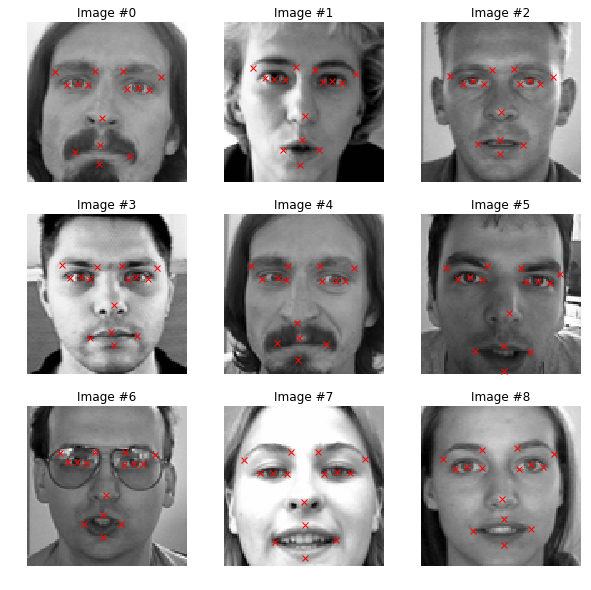

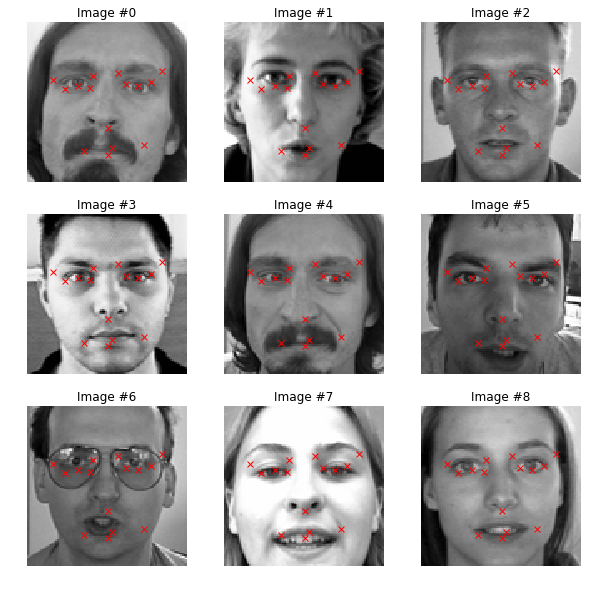

In [31]:
clf_sgd.fit(X_train, y_train)
y_train_pred_sdg = clf_sgd.predict(X_train)
plot_random_with_points(
    images=train_data['Image_Matrix'],
    key_point_arrays=y_train[:10],
    nrows=3,
    ncols=3
)

plot_random_with_points(
    images=train_data['Image_Matrix'],
    key_point_arrays=y_train_pred_sdg[:10],
    nrows=3,
    ncols=3
)

measure_all('MLP_sdg', y_train, y_train_pred_sdg)

,mean_absolute_error,mean_squared_error,mean_squared_log_error,method,r2_score
0,1.83173,9.120715,0.005009,MLP_lbfgs,-3.023212e-11


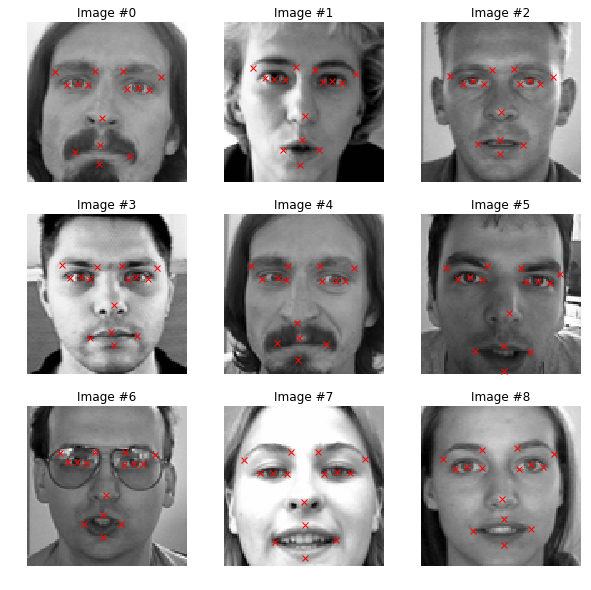

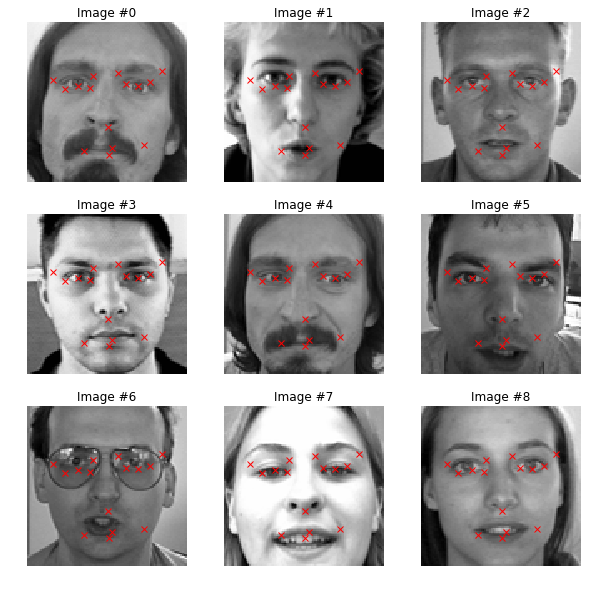

In [32]:
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
plot_random_with_points(
    images=train_data['Image_Matrix'],
    key_point_arrays=y_train[:10],
    nrows=3,
    ncols=3
)


plot_random_with_points(
    images=train_data['Image_Matrix'],
    key_point_arrays=y_train_pred[:10],
    nrows=3,
    ncols=3
)

measure_all('MLP_lbfgs', y_train, y_train_pred)

Iteration 1, loss = 14331.79422661
Iteration 2, loss = 1337.54998886
Iteration 3, loss = 1336.59363495
Iteration 4, loss = 1335.52791999
Iteration 5, loss = 1334.38767436
Iteration 6, loss = 1333.19128007
Iteration 7, loss = 1331.94984935
Iteration 8, loss = 1330.67154679
Iteration 9, loss = 1329.36207334
Iteration 10, loss = 1328.31536205
Iteration 11, loss = 1326.66985334
Iteration 12, loss = 1325.29090224
Iteration 13, loss = 1323.89207888
Iteration 14, loss = 1322.47699137
Iteration 15, loss = 1321.04664463
Iteration 16, loss = 1319.60298998
Iteration 17, loss = 1318.14694530
Iteration 18, loss = 1316.67965419
Iteration 19, loss = 1315.20197827
Iteration 20, loss = 1313.71492633
Iteration 21, loss = 1312.21907231
Iteration 22, loss = 1310.71505369
Iteration 23, loss = 1309.20361494
Iteration 24, loss = 1307.68519796
Iteration 25, loss = 1306.16026575
Iteration 26, loss = 1304.62907544
Iteration 27, loss = 1303.09252159
Iteration 28, loss = 1301.55075227
Iteration 29, loss = 1300.00

Iteration 232, loss = 988.59852089
Iteration 233, loss = 987.17805342
Iteration 234, loss = 985.75879626
Iteration 235, loss = 984.34062534
Iteration 236, loss = 982.92362953
Iteration 237, loss = 981.50804338
Iteration 238, loss = 980.09367408
Iteration 239, loss = 978.68068226
Iteration 240, loss = 977.26888310
Iteration 241, loss = 975.85833500
Iteration 242, loss = 974.44919908
Iteration 243, loss = 973.04118428
Iteration 244, loss = 971.63449421
Iteration 245, loss = 970.22898951
Iteration 246, loss = 968.82481647
Iteration 247, loss = 967.42198705
Iteration 248, loss = 966.02022201
Iteration 249, loss = 964.61979226
Iteration 250, loss = 963.22065237
Iteration 251, loss = 961.82261976
Iteration 252, loss = 960.42594016
Iteration 253, loss = 959.03034690
Iteration 254, loss = 957.63620942
Iteration 255, loss = 956.24319564
Iteration 256, loss = 954.85157101
Iteration 257, loss = 953.46120160
Iteration 258, loss = 952.07227280
Iteration 259, loss = 950.68434718
Iteration 260, loss 

Iteration 467, loss = 689.11436802
Iteration 468, loss = 687.98640641
Iteration 469, loss = 686.85954328
Iteration 470, loss = 685.73386658
Iteration 471, loss = 684.60954247
Iteration 472, loss = 683.48637264
Iteration 473, loss = 682.36446589
Iteration 474, loss = 681.24368614
Iteration 475, loss = 680.12432969
Iteration 476, loss = 679.00606653
Iteration 477, loss = 677.88929600
Iteration 478, loss = 676.77346290
Iteration 479, loss = 675.65896538
Iteration 480, loss = 674.54562312
Iteration 481, loss = 673.43348843
Iteration 482, loss = 672.32258706
Iteration 483, loss = 671.21288990
Iteration 484, loss = 670.10453995
Iteration 485, loss = 668.99725185
Iteration 486, loss = 667.89126578
Iteration 487, loss = 666.78652681
Iteration 488, loss = 665.68299378
Iteration 489, loss = 664.58075050
Iteration 490, loss = 663.47964562
Iteration 491, loss = 662.37991076
Iteration 492, loss = 661.28116763
Iteration 493, loss = 660.18377089
Iteration 494, loss = 659.08755406
Iteration 495, loss 

Iteration 702, loss = 457.07498266
Iteration 703, loss = 456.22671031
Iteration 704, loss = 455.37967782
Iteration 705, loss = 454.53363993
Iteration 706, loss = 453.68881733
Iteration 707, loss = 452.84504404
Iteration 708, loss = 452.00236730
Iteration 709, loss = 451.16098592
Iteration 710, loss = 450.32088489
Iteration 711, loss = 449.48180199
Iteration 712, loss = 448.64401397
Iteration 713, loss = 447.80726782
Iteration 714, loss = 446.97156784
Iteration 715, loss = 446.13709623
Iteration 716, loss = 445.30376675
Iteration 717, loss = 444.47149785
Iteration 718, loss = 443.64034215
Iteration 719, loss = 442.81036042
Iteration 720, loss = 441.98171309
Iteration 721, loss = 441.15414464
Iteration 722, loss = 440.32788134
Iteration 723, loss = 439.50254078
Iteration 724, loss = 438.67835040
Iteration 725, loss = 437.85526111
Iteration 726, loss = 437.03341209
Iteration 727, loss = 436.21278221
Iteration 728, loss = 435.39321612
Iteration 729, loss = 434.57476308
Iteration 730, loss 

,mean_absolute_error,mean_squared_error,mean_squared_log_error,method,r2_score
0,3.89813,34.599233,0.010946,MLP_relu,-3.48976


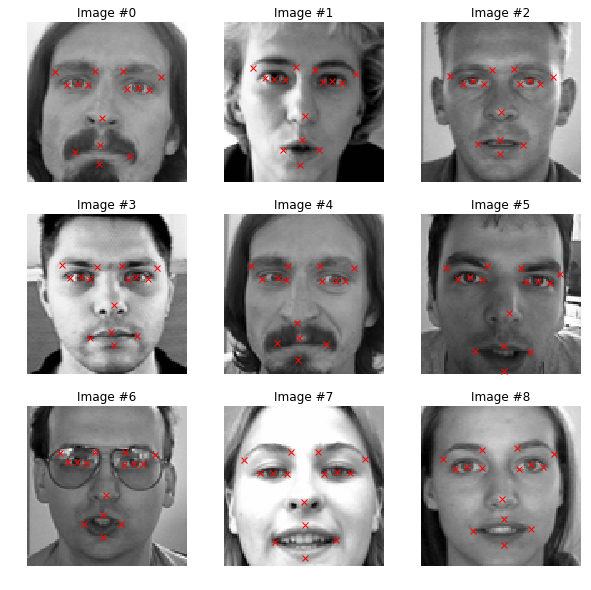

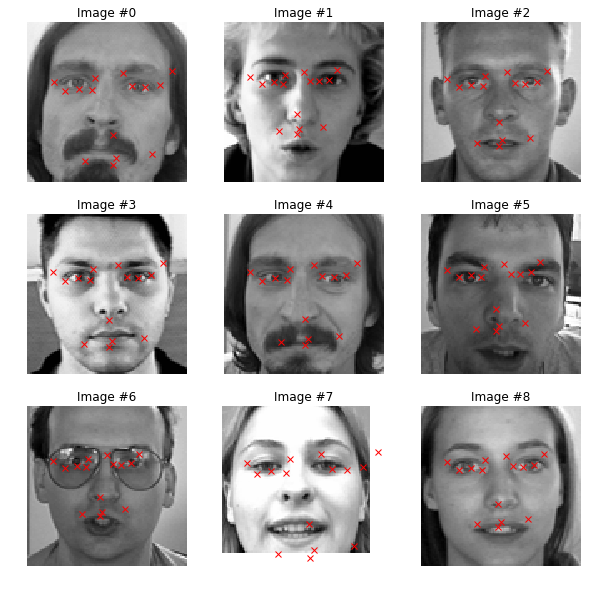

In [33]:
clf_relu.fit(X_train, y_train)
y_train_pred_relu = clf_relu.predict(X_train)
plot_random_with_points(
    images=train_data['Image_Matrix'],
    key_point_arrays=y_train[:10],
    nrows=3,
    ncols=3
)


plot_random_with_points(
    images=train_data['Image_Matrix'],
    key_point_arrays=y_train_pred_relu[:10],
    nrows=3,
    ncols=3
)

measure_all('MLP_relu', y_train, y_train_pred_relu)

### Discussion

Multilayer perceptron models chosen, using Relu (the rectified linear unit function, returns f(x) = max(0, x)) and Logistic activation functions performed relatively poorly on the image training set.

This is expected behavior as the problem at hand contains data that is not perfectly linearly seperable. That is there doesn't exist some hyperplane in R2 that seperates all the features. This also creates significant issues for the Relu activation solver as this limits convergence of the weights. As these weights do not converge to reasonable tolerance, the algorithm finds it difficult to classify each point correctly.

The limitations of perceptron become apparent ont his dataset. The decision boundaries being only linear limits classification margins. To massage some of these issues, we need to incoporate feature mapping, PCA and feature combinations to reduce the dimensionality of the images and relax decision boundaries. 

